### Question: how many deaths are to be expected for 2016 and 2017 ?

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
death_1950_2015 = pd.read_csv('./data/death_1950_2015.csv')
death_1950_2015.set_index('Jahr', inplace=True)

local_kwargs {'data_path': './data/marriages_1950_2015.csv, ./data/marriages_groupby_age2015.csv, ./data/marriages_groupby_de_1994_2015.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
death_1950_2015.head()

,männlich,weiblich,Insgesamt
Jahr,,,
1950,375323.0,373006.0,748329.0
1951,380155.0,372542.0,752697.0
1952,387003.0,380636.0,767639.0
1953,400373.0,390281.0,790654.0
1954,392610.0,382681.0,775291.0


### 1. Linear Regression

In [3]:
# from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = death_1950_2015['Insgesamt'].values

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
len(X[0:len(X)-5])+ len(X[len(X)-5:])
X[1:len(X)-5]

array([ 752697.,  767639.,  790654.,  775291.,  795938.,  812111.,
        840195.,  818418.,  835402.,  876721.,  850300.,  878814.,
        895070.,  870319.,  907882.,  911984.,  914417.,  976521.,
        988092.,  975664.,  965623.,  965689.,  962988.,  956573.,
        989649.,  966873.,  931155.,  955550.,  944474.,  952371.,
        954436.,  943832.,  941032.,  917299.,  929649.,  925426.,
        901291.,  900627.,  903441.,  921445.,  911245.,  885443.,
        897270.,  884661.,  884588.,  882843.,  860389.,  852382.,
        846330.,  838797.,  828541.,  841686.,  853946.,  818271.,
        830227.,  821627.,  827155.,  844439.,  854544.,  858768.])

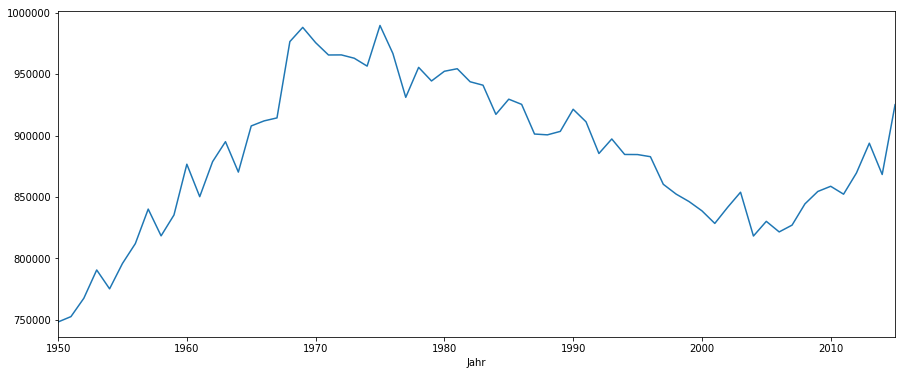

In [5]:
death_1950_2015['Insgesamt'].plot()

In [6]:
# from sklearn.linear_model import LinearRegression
# reg_lin = LinearRegression()
X_train = death_1950_2015['Insgesamt'].index
y_train = death_1950_2015['Insgesamt'].values
# reg_lin.fit(X_train.values.reshape(-1,1), y_train)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train.values.reshape(-1,1))
poly_reg.fit(X_poly, y_train)
reg_lin = LinearRegression()
reg_lin.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
X_test_true = death_1950_2015['Insgesamt'].index[60:66]
y_true = death_1950_2015['Insgesamt'].values[60:66]
X_test_true, y_true

(Int64Index([2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='Jahr'),
 array([ 858768.,  852328.,  869582.,  893825.,  868356.,  925200.]))

In [9]:
y_pred_lin = reg_lin.predict(poly_reg.fit_transform(X_test_true.values.reshape(-1,1)))
y_pred_lin, y_true

(array([ 854646.72558594,  858098.44451904,  862365.76812744,
         867486.73886108,  873499.3991394 ,  880441.79138184]),
 array([ 858768.,  852328.,  869582.,  893825.,  868356.,  925200.]))

In [10]:
print(mean_squared_error(y_true, y_pred_lin))


470968788.07


In [11]:
# predict in year 2016, 2017
X_pred = np.array([[2016], [2017]])
y_pred = reg_lin.predict(poly_reg.fit_transform(X_pred))
y_pred

array([ 888351.95806885,  897267.94152832])

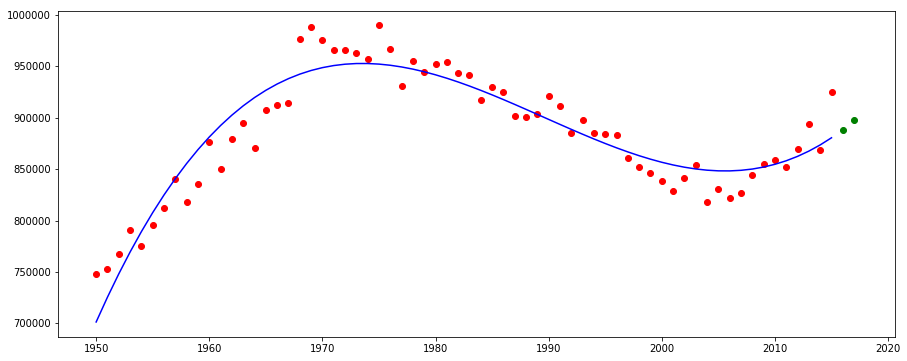

In [12]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### 2. Decision Tree Regression

In [13]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [14]:
y_pred_dt = reg_dt.predict(X_test_true.values.reshape(-1,1))
y_pred_dt, y_true

(array([ 858768.,  852328.,  869582.,  893825.,  868356.,  925200.]),
 array([ 858768.,  852328.,  869582.,  893825.,  868356.,  925200.]))

In [15]:
print(mean_squared_error(y_true, y_pred_dt))  # Overfitting ?

0.0


In [16]:
# Result
y_pred2 = reg_dt.predict(X_pred)
y_pred2

array([ 925200.,  925200.])

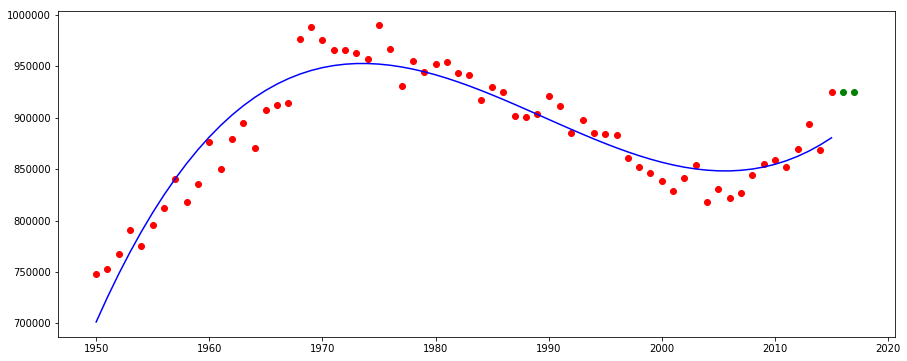

In [17]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred2, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### 3. Random Forest

In [18]:
reg_rf = RandomForestRegressor(n_estimators=10, random_state=0)
reg_rf.fit(X_train.values.reshape(-1,1), y_train)
reg_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred_rf = reg_rf.predict(X_test_true.values.reshape(-1,1))
y_pred_rf, y_true

(array([ 857923.2,  856629.4,  866830.1,  888853.8,  875996.7,  901871.8]),
 array([ 858768.,  852328.,  869582.,  893825.,  868356.,  925200.]))

In [20]:
print(mean_squared_error(y_true, y_pred_rf))  # error too large

109014453.963


In [21]:
# Result and comparing with the above results
y_pred3 = reg_rf.predict(X_pred)
y_pred3, y_pred2, y_pred

(array([ 901871.8,  901871.8]),
 array([ 925200.,  925200.]),
 array([ 888351.95806885,  897267.94152832]))

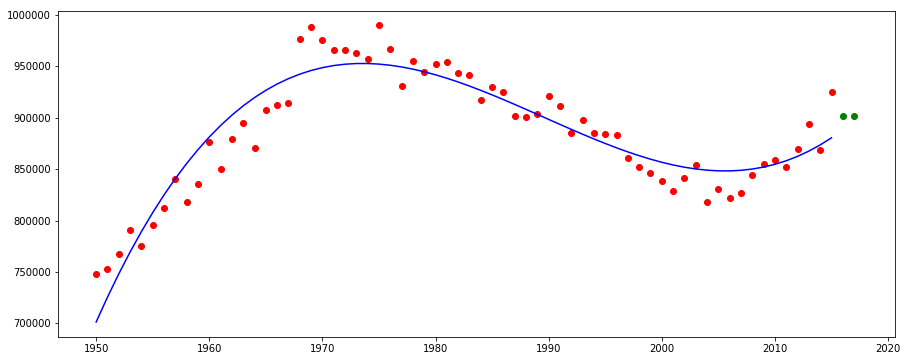

In [22]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred3, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### Final Result by computing the mean value of all 3 above results 

### (linear regression, decision tree, random forest)

In [23]:
y_pred_mean_2016 = np.mean([y_pred3[0], y_pred2[0], y_pred[0]])
y_pred_mean_2017 = np.mean([y_pred3[1], y_pred2[1], y_pred[1]])
y_pred_final = [y_pred_mean_2016, y_pred_mean_2017]
y_pred_final

[905141.25268961582, 908113.24717610667]

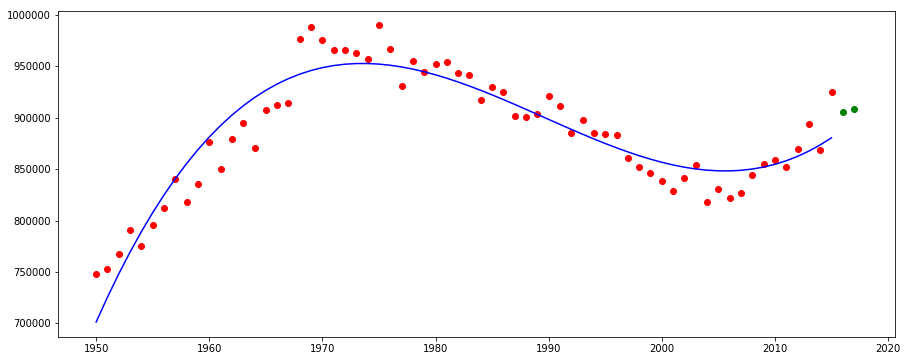

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred_final, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

In [25]:
# StartMod.validation(reg_lin, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_dt, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_rf, X_train.values.reshape(-1,1), y_train)